<img src="../images/DHWiki_banner.png" width="30%">

This is an example of reuse of the [DHwiki Wikibase](https://dhwiki.wikibase.cloud/wiki/Main_Page), hosted on [Wikibase Cloud](https://wikibase.cloud/), includes a Wikibase instance, and is maintained since September 2024 by the [DARIAH-EU WG DHwiki](https://www.dariah.eu/activities/working-groups/dhwiki/), in the framework of the [DARIAH ERIC](https://www.dariah.eu/). 

First of all, we include all the python packages that are required to run this example. We will create a new item in our wikibase.

In [23]:
from wikibaseintegrator import WikibaseIntegrator
from wikibaseintegrator import wbi_login
from wikibaseintegrator.wbi_config import config as wbi_config
from wikibaseintegrator.models import Qualifiers, References, Reference
from wikibaseintegrator import datatypes

### Set user and password

In [24]:
WDUSER = ''
WDPASS = ''

### Set variables

In [25]:
# this block is always the same
wbi_config['BACKOFF_MAX_TRIES'] = 5
wbi_config['BACKOFF_MAX_VALUE'] = 3600
wbi_config['USER_AGENT'] = "bot based on wikibaseintegrator"
wbi_config['PROPERTY_CONSTRAINT_PID'] = None # 'P2302'
wbi_config['DISTINCT_VALUES_CONSTRAINT_QID'] = None # 'Q21502410'
wbi_config['COORDINATE_GLOBE_QID'] = 'http://www.wikidata.org/entity/Q2'
wbi_config['CALENDAR_MODEL_QID'] = 'http://www.wikidata.org/entity/Q1985727'

#this block depends on your wikibase
wbi_config['MEDIAWIKI_API_URL'] = 'https://dh2025.wikibase.cloud/w/api.php'
wbi_config['MEDIAWIKI_INDEX_URL'] = "https://dh2025.wikibase.cloud/w/index.php"
wbi_config['MEDIAWIKI_REST_URL'] = "https://dh2025.wikibase.cloud/w/rest.php"
wbi_config['SPARQL_ENDPOINT_URL'] = "https://dh2025.wikibase.cloud/query/sparql"
wbi_config['WIKIBASE_URL'] = "https://dh2025.wikibase.cloud"
wbi_config['DEFAULT_LANGUAGE'] = 'en'
wbi_config['DEFAULT_LEXEME_LANGUAGE'] = "Q1" # This is for Lexemes. Value None raises error.

login = wbi_login.Login(user=WDUSER, password=WDPASS)
bot = WikibaseIntegrator(login=login)
print('**** Wikibase bot username and password accepted, bot is being loaded. ****')

MediaWiki login warnings messages:
* main: Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes.
* login: Main-account login via "action=login" is deprecated and may stop working without warning. To continue login with "action=login", see [[Special:BotPasswords]]. To safely continue using main-account login, see "action=clientlogin".


**** Wikibase bot username and password accepted, bot is being loaded. ****


Finally, we can retrieve the triples as JSON using the following code:

### Create a new item

In [46]:
new_item = bot.item.new()

### Set labels

In [47]:
new_item.labels.set('en', 'New item')
new_item.labels.set('fr', 'Nouvel élément')
new_item.labels.set('es', 'Nuevo elemento')

<LanguageValue @eb9590 _LanguageValue__language='es' _LanguageValue__value='Nuevo elemento' _LanguageValue__removed=False>

### Set aliases

In [48]:
new_item.aliases.set('en', 'Item')
new_item.aliases.set('fr', 'Élément')

<Aliases @e9b390 _Aliases__aliases={'en': [<Alias @f06a50 _LanguageValue__language='en' _LanguageValue__value='Item' _LanguageValue__removed=False>], 'fr': [<Alias @f04dd0 _LanguageValue__language='fr' _LanguageValue__value='Élément' _LanguageValue__removed=False>]}>

### Set descriptions

In [49]:
new_item.descriptions.set('en', 'A freshly created element')
new_item.descriptions.set('fr', 'Un élément fraichement créé')
new_item.descriptions.set('es', 'Un elemento recién creado')

<LanguageValue @e99710 _LanguageValue__language='es' _LanguageValue__value='Un elemento recién creado' _LanguageValue__removed=False>

### Create a claim, with qualifiers and references, and add it to the new item entity

In [50]:
new_qualifiers = Qualifiers()
new_qualifiers.add(datatypes.String(prop_nr='P2', value='Item qualifier'))

new_references = References()
new_reference1 = Reference()
new_reference1.add(datatypes.String(prop_nr='P2', value='Item string reference'))

new_reference2 = Reference()
new_reference2.add(datatypes.String(prop_nr='P2', value='Another item string reference'))

new_references.add(new_reference1)
new_references.add(new_reference2)

new_claim_string = datatypes.String(prop_nr='P1', value='A String property', qualifiers=new_qualifiers, references=new_references)

new_item.claims.add(new_claim_string)

new_claim_time = datatypes.Time(prop_nr='P3', time='now')

new_item.claims.add(new_claim_time)

<Claims @e98d90 _Claims__claims={'P1': [<String @f06b50 _Claim__mainsnak=<Snak @f06e50 _Snak__snaktype=<WikibaseSnakType.KNOWN_VALUE: 'value'> _Snak__property_number='P1' _Snak__hash=None _Snak__datavalue={'value': 'A String property', 'type': 'string'} _Snak__datatype='string'> _Claim__type='statement' _Claim__qualifiers=<Qualifiers @f06c50 _Qualifiers__qualifiers={'P2': [<Snak @55b50 _Snak__snaktype=<WikibaseSnakType.KNOWN_VALUE: 'value'> _Snak__property_number='P2' _Snak__hash=None _Snak__datavalue={'value': 'Item qualifier', 'type': 'string'} _Snak__datatype='string'>]}> _Claim__qualifiers_order=[] _Claim__id=None _Claim__rank=<WikibaseRank.NORMAL: 'normal'> _Claim__removed=False _Claim__references=<References @f07750 _References__references=[<Reference @f05850 _Reference__hash=None _Reference__snaks=<Snaks @f04090 snaks={'P2': [<Snak @f07c10 _Snak__snaktype=<WikibaseSnakType.KNOWN_VALUE: 'value'> _Snak__property_number='P2' _Snak__hash=None _Snak__datavalue={'value': 'Item string 

### Write the new item to the Wikibase instance

In [51]:
new_item.write()

<ItemEntity @e98b90 _BaseEntity__api=<wikibaseintegrator.wikibaseintegrator.WikibaseIntegrator object at 0x773fede9b090>
	 _BaseEntity__title=None
	 _BaseEntity__pageid=None
	 _BaseEntity__lastrevid=8
	 _BaseEntity__type='item'
	 _BaseEntity__id='Q5'
	 _BaseEntity__claims=<Claims @4a450 _Claims__claims={'P1': [<String @f7a050 _Claim__mainsnak=<Snak @84a690 _Snak__snaktype=<WikibaseSnakType.KNOWN_VALUE: 'value'> _Snak__property_number='P1' _Snak__hash='59f44c4e235fe0e8ec4c2a939f74ff3beeeab2ae' _Snak__datavalue={'value': 'A String property', 'type': 'string'} _Snak__datatype='string'> _Claim__type='statement' _Claim__qualifiers=<Qualifiers @196dd0 _Qualifiers__qualifiers={'P2': [<Snak @614e10 _Snak__snaktype=<WikibaseSnakType.KNOWN_VALUE: 'value'> _Snak__property_number='P2' _Snak__hash='c910073ed50fe25a936de1583ea16d4ec0277c9f' _Snak__datavalue={'value': 'Item qualifier', 'type': 'string'} _Snak__datatype='string'>]}> _Claim__qualifiers_order=['P2'] _Claim__id='Q5$8D63A3AA-58C3-4138-A8F

### And now we can see the result

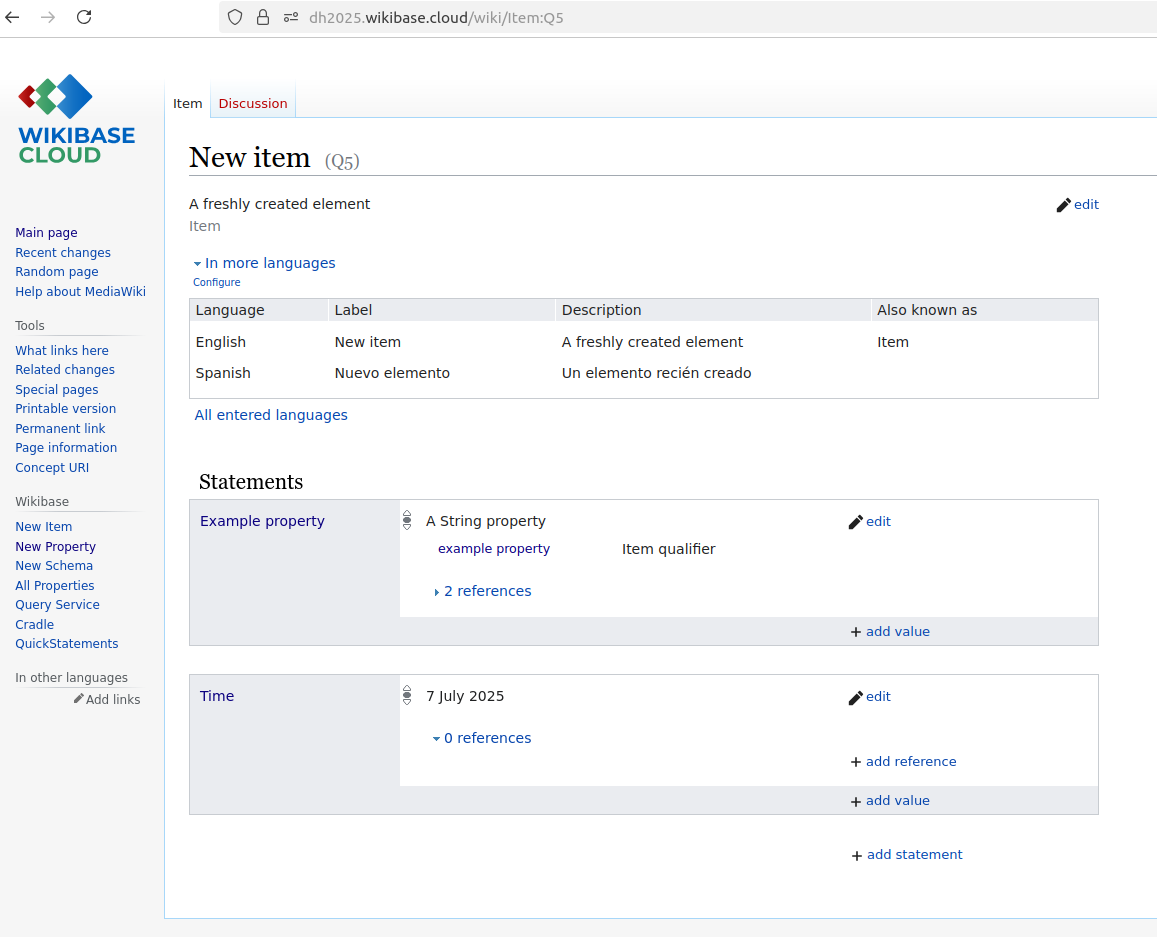

# References
https://github.com/LeMyst/WikibaseIntegrator/blob/master/notebooks/item_create_new.ipynb